In [1]:
import sys
sys.path.insert(0,'/home/mohit/Downloads/code_notebooks/deep_boltzmann')
from deep_boltzmann.sampling.metropolis import MetropolisGauss
from deep_boltzmann.models.particle_dimer import ParticleDimer
from deep_boltzmann.sampling.permutation import HungarianMapper
import numpy as np

Using TensorFlow backend.


In [2]:
System = ParticleDimer()
positions = System.init_positions(1.5)
print(len(positions[0]))


76


In [3]:
idx=[i for i in range(38)]
print(idx)
identical = []
temp = [i for i in range(2,38)]
identical = identical + temp
print(np.asarray(identical))
identical = np.asarray(identical)
identical = identical.astype('int32')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37]


In [5]:
HungarianMC= MetropolisGauss(System, positions, mapper = HungarianMapper(positions,identical_particles= identical) )
HungarianMC.run(nsteps= 200, verbose= 10000)

Step 0 / 200


In [6]:
ParticleDimer().draw_config(HungarianMC.traj[-1])

[[-0.25  0.    0.25  0.   -3.   -3.   -3.   -1.8  -3.   -0.6  -3.    0.6
  -3.    1.8  -3.    3.   -1.8  -3.   -1.8  -1.8  -1.8  -0.6  -1.8   0.6
  -1.8   1.8  -1.8   3.   -0.6  -3.   -0.6  -1.8  -0.6  -0.6  -0.6   0.6
  -0.6   1.8  -0.6   3.    0.6  -3.    0.6  -1.8   0.6  -0.6   0.6   0.6
   0.6   1.8   0.6   3.    1.8  -3.    1.8  -1.8   1.8  -0.6   1.8   0.6
   1.8   1.8   1.8   3.    3.   -3.    3.   -1.8   3.   -0.6   3.    0.6
   3.    1.8   3.    3.  ]]


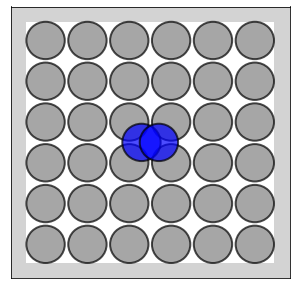

In [7]:
positions = ParticleDimer().init_positions(1.5)
positions[0][0]= -0.25
positions[0][2]= 0.25
print(positions[0:5])
System.draw_config(positions)

In [8]:
ClosedHungarianMC= MetropolisGauss(System, positions, mapper = HungarianMapper(positions,identical_particles= identical) )
ClosedHungarianMC.run(nsteps= 200, verbose= 10000)

Step 0 / 200


In [9]:
np.savez('output.npz', traj_open_train_hungarian = HungarianMC.traj[:100000], traj_open_test_hungarian = HungarianMC.traj[100000:],  traj_closed_train_hungarian = ClosedHungarianMC.traj[:100000], traj_closed_test_hungarian = HungarianMC.traj[100000:])